# The Relationship between Welfare Metrics of US States and Counties on the Severity of COVID-19

## Introduction

COVID-19 has been treated as a cause of welfare distortions across the past few years having disrupted the global economy and every individual's lifestyle. Having affected minorities and vulnerable demographics the most severely. However consider the severity of COVID-19 as reliant on how good or bad one's quality of life may be. In this case welfare metrics and their indication of a quality of life is treated as the primary cause as to how detrimental COVID has become. Hence the accelerated transmission of COVID from epidemic to pandemic may have been due to poor cases of welfare that spurred on the survival of the virus.

As such the focus of this paper is to assess how correlated welfare metrics are in transgressing the severity of COVID-19 in US counties and states. For this, welfare metrics is to be defined as a measure of wellbeing and "better life" indicators. Thus this paper quantifies an array of variables that have implicit and explicit effects on quality of life and assess whether certain conditions have propogated a worsening of COVID-19's impact.

The source of data is from FiveThirtyEight, an online opinion and analysis pollster, with the data on county results for 2020 and 2016 US Presidential polls, demographic makeup, employment type and level, and income and poverty levels.

Initial findings through simple regression analysis indicates weak to no correlation across the board, however through comparisons with several COVID metrics and state and county level some correlation is suggested.


## Data cleaning and Loading

In [1]:
! pip install qeds fiona geopandas xgboost gensim folium pyLDAvis descartes

import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.express as px
from plotly.offline import init_notebook_mode
init_notebook_mode(connected=True)
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from IPython.display import display
import geopandas as gpd
from shapely.geometry import Point
import qeds

In [2]:
county_stats = pd.read_csv(r'/Users/adieaimannazrinnoornazri/ECO225/Project Data/county_statistics.csv')

Comparing the non-null and null values, we see that there is a maximum of 1756 null value rows present in the dataset.

In [3]:
county_stats.isnull().sum()

Unnamed: 0                         0
county                             0
state                              0
percentage16_Donald_Trump       1756
percentage16_Hillary_Clinton    1756
total_votes16                   1756
votes16_Donald_Trump            1756
votes16_Hillary_Clinton         1756
percentage20_Donald_Trump        377
percentage20_Joe_Biden           377
total_votes20                    234
votes20_Donald_Trump             234
votes20_Joe_Biden                234
lat                             1615
long                            1615
cases                           1615
deaths                          1615
TotalPop                        1725
Men                             1725
Women                           1725
Hispanic                        1725
White                           1725
Black                           1725
Native                          1725
Asian                           1725
Pacific                         1725
VotingAgeCitizen                1725
I

As some counties have no voting statistics meaning we are unable to know which political party won, we will be entirely dropping these rows.

In [4]:
county_stats.dropna(inplace=True, axis=0)
county_stats

Unnamed: 0     county state  percentage16_Donald_Trump  \
0              0  Abbeville    SC                      0.629   
1              1     Acadia    LA                      0.773   
2              2   Accomack    VA                      0.545   
3              3        Ada    ID                      0.479   
4              4      Adair    IA                      0.653   
...          ...        ...   ...                        ...   
3106        3106       Yuma    AZ                      0.505   
3107        3107       Yuma    CO                      0.805   
3108        3108     Zapata    TX                      0.328   
3109        3109     Zavala    TX                      0.204   
3110        3110    Ziebach    SD                      0.480   

      percentage16_Hillary_Clinton  total_votes16  votes16_Donald_Trump  \
0                            0.346        10724.0                6742.0   
1                            0.206        27386.0               21159.0   
2                            0.428        15755.0                8582.0   
3                            0.387       195587.0               93748.0   
4                            0.300         3759.0                2456.0   
...                            ...            ...                   ...   
3106                         0.450        40759.0               20586.0   
3107                         0.150         4664.0                3755.0   
3108                         0.656         3134.0                1028.0   
3109                         0.777         3390.0                 692.0   
3110                         0.460          766.0                 368.0   

      votes16_Hillary_Clinton  percentage20_Donald_Trump  \
0                      3712.0                      0.661   
1                      5638.0                      0.795   
2                      6737.0                      0.542   
3                     75676.0                      0.504   
4                      1127.0                      0.697   
...                       ...                        ...   
3106                  18336.0                      0.523   
3107                    701.0                      0.826   
3108                   2056.0                      0.525   
3109                   2633.0                      0.340   
3110                    352.0                      0.446   

      percentage20_Joe_Biden  ...  Walk  OtherTransp  WorkAtHome  MeanCommute  \
0                      0.330  ...   1.8          1.8         6.5         25.8   
1                      0.191  ...   1.6          2.2         2.5         27.6   
2                      0.447  ...   2.6          1.8         4.5         22.0   
3                      0.465  ...   1.5          2.8         6.9         20.4   
4                      0.286  ...   2.8          0.4         6.2         22.3   
...                      ...  ...   ...          ...         ...          ...   
3106                   0.461  ...   2.4          1.8         3.0         19.6   
3107                   0.156  ...   6.5          0.3        10.5         15.7   
3108                   0.471  ...   4.4          0.6         2.0         18.2   
3109                   0.654  ...   2.1          4.2         5.4         13.7   
3110                   0.531  ...   4.3          3.4        25.9         22.8   

      Employed  PrivateWork  PublicWork  SelfEmployed  FamilyWork  \
0       9505.0         78.8        13.3           7.8         0.1   
1      24982.0         80.0        12.1           7.6         0.3   
2      13837.0         74.6        18.1           7.1         0.2   
3     214984.0         78.3        15.0           6.6         0.1   
4       3680.0         73.8        15.3          10.4         0.5   
...        ...          ...         ...           ...         ...   
3106   74891.0         74.4        20.8           4.6         0.2   
3107    4940.0         71.6        15.5          12.4         0.5   
3108    5146.0       

In [5]:
county_stats.isnull().sum()

Unnamed: 0                      0
county                          0
state                           0
percentage16_Donald_Trump       0
percentage16_Hillary_Clinton    0
total_votes16                   0
votes16_Donald_Trump            0
votes16_Hillary_Clinton         0
percentage20_Donald_Trump       0
percentage20_Joe_Biden          0
total_votes20                   0
votes20_Donald_Trump            0
votes20_Joe_Biden               0
lat                             0
long                            0
cases                           0
deaths                          0
TotalPop                        0
Men                             0
Women                           0
Hispanic                        0
White                           0
Black                           0
Native                          0
Asian                           0
Pacific                         0
VotingAgeCitizen                0
Income                          0
IncomeErr                       0
IncomePerCap  

Now all counties with missing datapoints have been removed. This was necessary as we want to find exactly how many counties voted Democratic or Republican, one of the key independent variables we will consider.

For ease of dealing with the datapoints, the table will order datapoints for each state proceeding one another rather than separated.

In [6]:
county_stats = county_stats.sort_values(['state','county'], ascending = [True, True])

For some columns we will convert the datapoints into percentages to see the change over time. This is necessary as we would like to see how any change over time in political leaning has an impact on COVID-19 cases.

In this following function, new columns were created for the relevant values needed. One of these being which party each county voted for in 2020 and 2016. Additionally a vote swing column will be added to see whether the vote switched parties.

In [7]:
def percentages(county_stats):
    county_stats["% \u0394 in Total Votes"] = ((county_stats['total_votes20'] - county_stats['total_votes16'])/county_stats['total_votes16'])*100
    county_stats["% \u0394 in Rep. Votes"] = county_stats["percentage20_Donald_Trump"] - county_stats["percentage16_Donald_Trump"]
    county_stats["% \u0394 in Dem. Votes"] = county_stats['percentage20_Joe_Biden'] - county_stats['percentage16_Hillary_Clinton']
    county_stats["percentage20_Donald_Trump"] = county_stats["percentage20_Donald_Trump"] * 100
    county_stats["percentage16_Donald_Trump"] = county_stats["percentage16_Donald_Trump"] * 100
    county_stats['percentage16_Hillary_Clinton'] = county_stats['percentage16_Hillary_Clinton'] * 100
    county_stats['percentage20_Joe_Biden'] = county_stats['percentage20_Joe_Biden'] * 100
    county_stats['COVID Cases per Capita'] = county_stats['cases'] / county_stats['TotalPop']
    county_stats['Employment Rate'] = 100 - county_stats['Unemployment'] 
    county_stats['Elected 2016'] = np.where(county_stats['percentage16_Donald_Trump'] > county_stats['percentage16_Hillary_Clinton'], 'Republican', 'Democrat')
    county_stats['Elected 2020'] = np.where(county_stats['percentage20_Donald_Trump'] > county_stats['percentage20_Joe_Biden'], 'Republican', 'Democrat')  
    county_stats['Vote Swing'] = np.where(county_stats['Elected 2016'] != county_stats['Elected 2020'], 'Yes', 'No')
    county_stats['COVID Death Rates'] = county_stats['deaths'] / county_stats['cases']
    county_stats['Majority Race'] = county_stats[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].idxmax(axis=1)
    county_stats['Minority Race'] = county_stats[['Hispanic', 'White', 'Black', 'Native', 'Asian', 'Pacific']].idxmin(axis=1)
percentages(county_stats)

This following line creates a new dataframe selecting only the relevant columns from the original data frame. In addition some columns were renamed in order for better clarity and presentation.

In [8]:
county_new = county_stats[['county', 'state','lat','long', '% \u0394 in Total Votes','% \u0394 in Rep. Votes', '% \u0394 in Dem. Votes', 'percentage20_Joe_Biden', 'percentage16_Hillary_Clinton', "percentage20_Donald_Trump","percentage16_Donald_Trump",'Elected 2016', 'Elected 2020'
                          ,'cases', 'deaths', 'COVID Cases per Capita', 'COVID Death Rates', 'Vote Swing', 'Employment Rate', 'Unemployment',
                          'TotalPop','Men','Women', 'Income','IncomeErr','IncomePerCap','IncomePerCapErr','Poverty','Professional',
                           'Service','Office','Construction','Production', 'PrivateWork','PublicWork','SelfEmployed','FamilyWork', 
                           'Hispanic','White','Black','Native','Asian','Pacific','Majority Race','Minority Race']].copy()
county_new = county_new.rename(columns={'percentage20_Joe_Biden': '2020 Democrat Vote Share %'})
county_new = county_new.rename(columns={'percentage16_Hillary_Clinton': '2016 Democrat Vote Share %'})
county_new = county_new.rename(columns={'percentage20_Donald_Trump': '2020 Republican Vote Share %'})
county_new = county_new.rename(columns={'percentage16_Donald_Trump': '2016 Republican Vote Share %'})
county_new = county_new.rename(columns={"Unemployment": 'Unemployment Rate'})
county_new = county_new.rename(columns={"Office": '% in Office Work'})
county_new = county_new.rename(columns={"Service": '% in Service Work'})
county_new = county_new.rename(columns={"Production": '% in Production Work'})
county_new = county_new.rename(columns={"Construction": '% in Construction'})
county_new = county_new.rename(columns={"Professional": '% in Professional Work'})
county_new = county_new.rename(columns={"PrivateWork": '% in Private Work'})
county_new = county_new.rename(columns={"PublicWork": '% in Public Work'})
county_new = county_new.rename(columns={"SelfEmployed": '% in Self Employed'})
county_new = county_new.rename(columns={"FamilyWork": '% in Family Work'})
county_new = county_new.rename(columns={"IncomePerCap": 'Income Per Capita'})
county_new = county_new.rename(columns={"Poverty": 'Poverty Rate'})
county_new = county_new.rename(columns={"county": 'County'})
county_new = county_new.rename(columns={"cases": 'COVID Cases'})
county_new = county_new.rename(columns={"deaths": 'COVID Deaths'})
county_new = county_new.rename(columns={"state": 'State'})
county_new.reset_index(drop=True, inplace=True)
county_new

County State        lat        long  % Δ in Total Votes  \
0        Autauga    AL  32.539527  -86.644082           12.075747   
1        Baldwin    AL  30.727750  -87.722071           15.788075   
2        Barbour    AL  31.868263  -85.387129            0.644851   
3           Bibb    AL  32.996421  -87.125115            9.430727   
4         Blount    AL  33.982109  -86.567906            8.174441   
...          ...   ...        ...         ...                 ...   
3041  Sweetwater    WY  41.659439 -108.882788           -0.348118   
3042       Teton    WY  43.935225 -110.589080           20.540407   
3043       Uinta    WY  41.287818 -110.547578           16.751521   
3044    Washakie    WY  43.904516 -107.680187            7.994616   
3045      Weston    WY  43.839612 -104.567488            6.238752   

      % Δ in Rep. Votes  % Δ in Dem. Votes  2020 Democrat Vote Share %  \
0                -0.019              0.030                        27.0   
1                -0.012              0.027                        22.3   
2                 0.013             -0.011                        45.6   
3                 0.014             -0.007                        20.7   
4                -0.003              0.011                         9.6   
...                 ...                ...                         ...   
3041              0.008              0.036                        23.0   
3042             -0.026              0.070                        67.1   
3043              0.033              0.020                        16.9   
3044              0.025              0.019                        16.2   
3045              0.008              0.014                        10.2   

      2016 Democrat Vote Share %  2020 Republican Vote Share %  ...  \
0                           24.0                          71.5  ...   
1                           19.6                          76.2  ...   
2                           46.7                          53.6  ...   
3                           21.4                          78.4  ...   
4                            8.5                          89.6  ...   
...                          ...                           ...  ...   
3041                        19.4                          73.7  ...   
3042                        60.1                          29.6  ...   
3043                        14.9                          79.7  ...   
3044                        14.3                          80.9  ...   
3045                         8.8                          87.7  ...   

      % in Self Employed % in Family Work Hispanic  White  Black  Native  \
0                    5.6              0.1      2.7   75.4   18.9     0.3   
1                    6.3              0.1      4.4   83.1    9.5     0.8   
2                    6.5              0.3      4.2   45.7   47.8     0.2   
3                    6.3              0.3      2.4   74.6   22.0     0.4   
4                    4.0              0.1      9.0   87.4    1.5     0.3   
...                  ...              ...      ...    ...    ...     ...   
3041                 3.8              0.0     16.0   79.6    0.8     0.6   
3042                 6.5              0.0     15.0   81.5    0.5     0.3   
3043                 6.6              0.4      9.1   87.7    0.1     0.9   
3044                 8.1              0.2     14.2   82.2    0.3     0.4   
3045                 8.8              1.1      1.4   91.6    0.5     0.1   

      Asian Pacific  Majority Race  Minority Race  
0       0.9     0.0          White        Pacific  
1       0.7     0.0          White        Pacific  
2       0.6     0.0          Black        Pacific  
3       0.0     0.0          White          Asian  
4       0.1     0.0          White        Pacific  
...     ...     ...            ...            ...  
3041    0.6     0.5          White        Pacific  
3042    2.2     0.0          White        Pacific  
3043    0.1     0.0          White        Pacific  
3044  

Another dataframe will be created only with state results, this will meaning averaging out all the values of the counties corresponding to a certain state and displaying only that averaged value for each column.

We will use this to be able to plot graphs that use only state data.

In [9]:
states_only = county_new.copy()
states_only = states_only.groupby('State').mean().apply(list).reset_index()
states_only

State        lat        long  % Δ in Total Votes  % Δ in Rep. Votes  \
0     AL  32.884280  -86.710122            7.467182           0.003806   
1     AR  34.911889  -92.433978            4.447740           0.041227   
2     AZ  33.675904 -111.463232           50.144617           0.020400   
3     CA  37.843962 -120.728594           59.720353          -0.004655   
4     CO  38.935474 -105.486240           17.351495          -0.000016   
5     CT  41.635706  -72.673927          -90.099449          -0.146429   
6     DC  38.904178  -77.016560          -86.526660          -0.001000   
7     DE  39.109277  -75.533237           16.484102          -0.029333   
8     FL  28.940755  -82.700744           16.072987           0.012642   
9     GA  32.808532  -83.577430           19.361094          -0.001157   
10    HI  20.990647 -157.414456           33.176415           0.046750   
11    IA  42.029910  -93.465519            7.273714           0.026071   
12    ID  44.263401 -114.460125           21.154438           0.062136   
13    IL  39.866643  -89.187336            7.710840           0.020703   
14    IN  39.837353  -86.218568           10.255752           0.012000   
15    KS  38.485379  -98.084552           10.232528           0.014200   
16    KY  37.622144  -85.199891           10.424157           0.009933   
17    LA  31.083119  -91.818871            4.563176           0.011825   
18    MA  42.107510  -71.307476          -72.159571           0.004000   
19    MD  39.002434  -76.678248           10.941694          -0.024304   
20    ME  44.446483  -69.471397          -94.452379           0.042700   
21    MI  44.043620  -85.181696           16.387386           0.008783   
22    MN  45.552013  -94.430953            9.976421           0.019241   
23    MO  38.449557  -92.501038            6.358873           0.019096   
24    MS  32.792727  -89.645726            0.421004           0.011634   
25    MT  46.974691 -109.700395           16.915883           0.012893   
26    NC  35.624210  -79.501099           15.143096           0.006540   
27    ND  47.393507 -100.249393            5.235579           0.027283   
28    NE  41.321795  -99.039012           10.688701           0.009387   
29    NH  43.446261  -71.611908          -94.768982           0.040167   
30    NJ  40.286441  -74.622450           10.756612          -0.012333   
31    NM  34.618003 -105.857550           13.624208           0.050750   
32    NV  39.255997 -117.563994           14.801607           0.029647   
33    NY  42.544151  -75.474183           -1.309333           0.038935   
34    OH  40.310670  -82.835408            8.897191           0.025011   
35    OK  35.501914  -97.251400            5.209043           0.024286   
36    OR  44.492401 -121.476920           24.981173           0.000861   
37    PA  40.818078  -77.615318           16.343985           0.000687   
38    RI  41.715010  -71.376585          -67.678904          -0.094333   
39    SC  33.957472  -80.983400           14.497793           0.011891   
40    SD  44.287083  -99.260714            9.370439           0.013954   
41    TN  35.885102  -86.108723           21.303749           0.017516   
42    TX  31.660643  -98.653069           17.645246           0.023839   
43    UT  39.634858 -111.596054           47.286667           0.104138   
44    VA  37.590771  -78.628581           13.355778           0.006337   
45    VT  44.030390  -72.780817          -42.599452           0.031000   
46    WA  47.233786 -120.719220           55.915628           0.003077   
47    WI  44.395143  -89.797980           13.455307           0.015750   
48    WV  38.814254  -80.617455           11.085033           0.010382   
49    WY  43.086886 -107.153242           10.694581           0.006348   

    % Δ in Dem. Votes  2020 Democrat Vote Share %  2016 Democrat Vote Share %  \
0            0.004254                   34.214925                   33.789552   
1           -0.022893                   28.112000                 

# Summary Statistics Tables

Summary statistics  include the:

- Political affiliation (% $\Delta$ in Total Votes, % $\Delta$ in Rep. Votes, % $\Delta$ in Dem. Votes, Vote Swing) 
- Race (Majority and Minority races)
- Employment Type (Professional, Service, Office, Construction, Production, Private Work, Public Work, Self Employed, Family Work)
- Wealth (Income, Income per capita, Poverty Rate)
- Employment Level (Employment rate, Unemploment rate)

Each of these represent an X variable to be analysed with COVID data that includes total, per capita, and death rates. Political affiliation was chosen in order to represent how freedom in choosing a certain candidate or party has implications in the effectiveness of government policy against COVID. Race for the environmental circumstances individuals face that can lead to certain lifelong implications. Employment type for the risk in being exposed to COVID in certain physical environments. Wealth for the measure of access to quality infrastructure that can be critical to avoiding or combatting COVID. Finally employment level also for risk to certain environments and lack of access to life critical resources.

This will be seperated into two types of summary statistics, numerical and categorical.

## Numerical Summary Statistics:
- Covid Data
- Employment Type
- Wealth Level
- Employment Level

### Covid Data Summary Statistics (Counties)

In [10]:
covid_sum_stats = county_new[['COVID Cases','COVID Deaths','COVID Cases per Capita','COVID Death Rates']].describe()
covid_sum_stats.drop('count', inplace=True)
covid_sum_stats.loc["range"] = covid_sum_stats.loc['max'] - covid_sum_stats.loc['min']
covid_sum_stats.round(decimals=2)

COVID Cases  COVID Deaths  COVID Cases per Capita  COVID Death Rates
mean       2902.46         72.73                    0.03               0.02
std       10817.51        342.06                    0.02               0.02
min           0.00          0.00                    0.00               0.00
25%         241.25          3.00                    0.02               0.01
50%         654.50         11.00                    0.03               0.02
75%        1794.75         36.00                    0.04               0.03
max      309190.00       7404.00                    0.20               0.20
range    309190.00       7404.00                    0.20               0.20

### Covid Data Summary Statistics (States)

In [11]:
state_covid_sum_stats = states_only[['COVID Cases','COVID Deaths','COVID Cases per Capita','COVID Death Rates']].describe()
state_covid_sum_stats.drop('count', inplace=True)
state_covid_sum_stats.loc["range"] = state_covid_sum_stats.loc['max'] - state_covid_sum_stats.loc['min']
state_covid_sum_stats.round(decimals=2)

COVID Cases  COVID Deaths  COVID Cases per Capita  COVID Death Rates
mean       4020.61        130.00                    0.03               0.02
std        4388.09        199.77                    0.01               0.01
min         185.18          3.35                    0.00               0.01
25%        1281.43         17.48                    0.02               0.01
50%        2387.72         44.10                    0.02               0.02
75%        4065.15        102.81                    0.04               0.03
max       17369.00        778.76                    0.05               0.09
range     17183.82        775.41                    0.05               0.08

For the COVID data  for both **counties** and **states**, the metrics considered were the number of cases, number of deaths, cases per capita and death rates.

Differences are in the mean in that the **states** had a higher mean for COVID cases and COVID death than **counties**.

### COVID Cases:
The distribution of **COVID Cases** is **not symmetric** as the quartiles are **not uniformly** distributed from the median. This is characterized by a very **high** standard deviation and **high** range that indicates a great spread and variation in data. The data is **negative** or **left** skewed.

Additionally the mean and median are **far apart** thus COVID Cases has an **asymmetric distribution**

### COVID Deaths:
The distribution of **COVID Deaths** is **not symmetric** as the quartiles are **not uniformly** distributed from the median. This is characterized by a very **high** standard deviation and **high** range that indicates a great spread and variation in data. The data is **negative** or **left** skewed.

Additionally the mean and median are **far apart** thus COVID Cases has an **asymmetric distribution**

### COVID Cases per Capita:
The distribution of **COVID Cases per Capita** is **fairly symmetric** as the quartiles are **uniformly** distributed from the median. This is characterized by a **low** standard deviation and **low** range that indicates a low spread and variation in data. The data is **symmetric** or **not** skewed.

Additionally the mean and median are **equal** thus COVID Cases has an **symmetric distribution**

### COVID Death Rates:
The distribution of **COVID Death Rates** is **fairly symmetric** as the quartiles are **uniformly** distributed from the median. This is characterized by a **low** standard deviation and **low** range that indicates a low spread and variation in data. The data is **symmetric** or **not** skewed.

Additionally the mean and median are **equal** thus COVID Cases has an **symmetric distribution**. 

### Employment Type Summary Statistics

In [12]:
employment_sum_stats = county_new[['% in Professional Work',
                           '% in Service Work','% in Office Work','% in Construction','% in Production Work', '% in Private Work','% in Public Work','% in Self Employed','% in Family Work'] ].describe()
employment_sum_stats.loc["range"] = employment_sum_stats.loc['max'] - employment_sum_stats.loc['min']
employment_sum_stats.drop('count', inplace=True)
employment_sum_stats.round(decimals=2)

% in Professional Work  % in Service Work  % in Office Work  \
mean                    31.42              18.08             21.77   
std                      6.43               3.66              3.03   
min                     11.40               0.00              4.80   
25%                     27.20              15.70             19.82   
50%                     30.50              17.70             22.00   
75%                     34.80              20.00             23.80   
max                     69.00              46.40             37.20   
range                   57.60              46.40             32.40   

       % in Construction  % in Production Work  % in Private Work  \
mean               12.70                 16.03              75.22   
std                 4.12                  5.77               7.33   
min                 2.20                  0.00              32.10   
25%                 9.90                 11.80              71.80   
50%                12.20                 15.70              76.40   
75%                14.90                 19.70              80.30   
max                36.40                 48.70              88.80   
range              34.20                 48.70              56.70   

       % in Public Work  % in Self Employed  % in Family Work  
mean              16.69                7.81              0.28  
std                5.91                3.87              0.45  
min                4.40                0.00              0.00  
25%               12.60                5.30              0.10  
50%               15.60                6.80              0.20  
75%               19.30                9.20              0.30  
max               62.30               38.00              8.00  
range             57.90               38.00              8.00


In the Employment Type variable, all 3 types of skewedness exists. Office, Private, and Public are all **right** and **positively** skewed, whereas Professional, Service, Construction, Production and Self Employed are **left** and **negatively** skewed. The direction of skewedness depends on which of the differences between the middle and lower or upper and middle quartile is greater. Regardless they all have **asymmetric** distribution. For Family Work, despite the differences between the quartiles being equal, there is skewedness to the **right** as the mean is greater than the median. However as its range and standard deviation is low, the distribution isn't as spread out.

### Wealth Level Summary Statistics

In [13]:
wealth_sum_stats = county_new[['Income', 'Income Per Capita','Poverty Rate']].describe()
wealth_sum_stats.drop('count', inplace=True)
wealth_sum_stats.loc["range"] = wealth_sum_stats.loc['max'] - wealth_sum_stats.loc['min']
wealth_sum_stats.round(decimals=2)

Income  Income Per Capita  Poverty Rate
mean    49507.42           25914.91         15.99
std     12867.22            6115.95          6.50
min     19264.00           10960.00          2.40
25%     41115.00           21782.00         11.40
50%     47938.00           25211.00         15.20
75%     55433.25           28940.75         19.30
max    129588.00           69529.00         52.00
range  110324.00           58569.00         49.60


For the wealth level statistics, all the metrics are **left** and **negatively** skewed. Though we can consider the variation of how **asymmetric** their distributions are respectively by considering their standard deviations. For this Income, then Income per Capita and finally Poverty Rate would follow in terms of how great the spread of data is. This too is confirmed by looking at the range where they also descend in the same order. Hence while none are **uniformly** distributed they vary in the **skewedness**.

### Employment Level Summary Statistics

In [14]:
employment_level_sum_stats = county_new[['Employment Rate', 'Unemployment Rate']].describe()
employment_level_sum_stats.drop('count', inplace=True)
employment_level_sum_stats.loc["range"] = employment_level_sum_stats.loc['max'] - employment_level_sum_stats.loc['min']
employment_level_sum_stats.round(decimals=2)

Employment Rate  Unemployment Rate
mean             93.68               6.32
std               2.97               2.97
min              71.30               0.00
25%              92.20               4.40
50%              94.00               6.00
75%              95.60               7.80
max             100.00              28.70
range            28.70              28.70

The employment rate is **right** or **positively** skewed despite the standard deviation being **low**, the mean and median are **not equal** hence there is an **asymmentric** distribution. However as the range is **not too high** the spread of data isn't too great.

The unemployment rate is **left** or **negatively** skewed despite the standard deviation being **low**, the mean and median are **not equal** hence there is an **asymmentric** distribution. However as the range is **not too high** the spread of data isn't too great.

## Cateogorical Summary Statistics:
- Political Affiliation
- Race

Dealing with categorical statistics such as the vote swing which is a Yes or No query, we will use dummy variables to be able to computate it quantitatively into a summary statistics table.

The entirety of the tables are not all categorical with some numerical statistics included as well.

### Political Affiliation Summary Statistics

In [15]:
county_new_dum = pd.get_dummies(county_new, columns=['Vote Swing', 'Majority Race', 'Minority Race'])
county_new_dum.columns = county_new_dum.columns.str.replace('_', ' ')

political_sum_stats = county_new_dum[['% \u0394 in Total Votes', '% \u0394 in Rep. Votes','% \u0394 in Dem. Votes','Vote Swing No', 'Vote Swing Yes', '2020 Democrat Vote Share %', '2016 Democrat Vote Share %', '2020 Republican Vote Share %', '2016 Republican Vote Share %'] ].describe()
political_sum_stats.drop('count', inplace=True)
political_sum_stats.loc["range"] = political_sum_stats.loc['max'] - political_sum_stats.loc['min']
political_sum_stats.round(decimals=2)

% Δ in Total Votes  % Δ in Rep. Votes  % Δ in Dem. Votes  \
mean                12.61               0.02               0.01   
std                 20.90               0.03               0.03   
min                -99.34              -0.30              -0.27   
25%                  6.34               0.00              -0.00   
50%                 11.48               0.01               0.01   
75%                 17.45               0.03               0.03   
max                396.78               0.28               0.34   
range              496.12               0.58               0.60   

       Vote Swing No  Vote Swing Yes  2020 Democrat Vote Share %  \
mean            0.97            0.03                       32.62   
std             0.16            0.16                       15.51   
min             0.00            0.00                        3.10   
25%             1.00            0.00                       20.80   
50%             1.00            0.00                       29.55   
75%             1.00            0.00                       41.58   
max             1.00            1.00                       94.00   
range           1.00            1.00                       90.90   

       2016 Democrat Vote Share %  2020 Republican Vote Share %  \
mean                        31.23                         65.65   
std                         14.97                         15.63   
min                          3.10                          4.00   
25%                         20.30                         56.80   
50%                         28.20                         68.80   
75%                         39.30                         77.60   
max                         92.80                         96.20   
range                       89.70                         92.20   

       2016 Republican Vote Share %  
mean                          64.09  
std                           15.24  
min                            4.10  
25%                           55.70  
50%                           67.00  
75%                           75.20  
max                           95.30  
range                         91.20


For the political affiliation metrics, the **left** or **negative** skewed distribution were the % $\Delta$ in Total Votes, Republican Votes, Democratic Votes, and the 2020 and 2016 Democrat Vote Share %. For these the mean and median were **not equal** and the the relative range for all were fairly **high** leading to an **asymmetric** distribution.


However, while Vote Swing No and Yes had the differences between the middle and lower quartiles and the upper and middle quartiles **equal**; if we consider the mean and medians they are **not equal**. Thus, they cannot be perfectly uniform, rather Vote Swing No has a greater median than mean inferring perhaps it is skewed **left** or **negatively**. Vote Swing Yes is the opposite hence skewing **right** or **positively**.


The final metrics, 2020 and 2016 Republican Vote Share are skewed **right** or **positively** and looking at the mean and median they are **equal** implying **asymmetric** distribution. Moreover, the range for both are **high** hence a greater spread in the data.

### Race Summary Statistics

In [16]:
race_sum_stats = county_new[['Hispanic','White','Black','Native','Asian','Pacific']].describe()
race_sum_stats.drop('count', inplace=True)
race_sum_stats.loc["range"] = race_sum_stats.loc['max'] - race_sum_stats.loc['min']
race_sum_stats.round(decimals=2)

Hispanic   White  Black  Native  Asian  Pacific
mean       9.20   77.22   8.80    1.53   1.24     0.07
std       13.83   19.73  14.31    6.28   2.53     0.39
min        0.00    0.60   0.00    0.00   0.00     0.00
25%        2.00   65.70   0.60    0.10   0.30     0.00
50%        3.90   84.50   2.10    0.30   0.60     0.00
75%        9.40   93.00   9.80    0.60   1.20     0.10
max       99.20  100.00  86.90   82.20  41.80    11.40
range     99.20   99.40  86.90   82.20  41.80    11.40


For the race statistics, White and Asian datapoints are skewed **right** or **positively** thus with an **asymmetric** distribution. This can be seen in the unequal values between their respective mean and median, in addition the high range and standard deviation acknowledges a large variation in the data.

On the other hand Hispanic, Black, Native and Pacific are skewed **left** or **negatively** but still with an **asymmetric** distribution. This too is seen in the differences in the mean and medians. However Pacific and Asian can be considered less skewed and closer to uniform due to their smaller range and much lower standard deviation compared to the other metrics.

# Plots, Histograms, Figures

## Political Affiliation

For this particular graph below the chosen X value to be assessed were the swing in votes. In this case the number of counties that saw the elected party switch due to a change in votes from 2016 to 2020. This metric was assessed against the Y value, COVID statistics, being number of cases and deaths as a total as well as per capita. 

These variables were chosen as it would be significant to see whether a shift in political affiliation between either Republican or Democrat saw any impact on COVID.

Interpreting the results it is observable that the swing towards Democrat is much larger than that towards Republican and that Democrat swings have a much higher total of COVID cases despite the non-swing counties have roughly about the same. In addition if we consider the per capita and rate, we see a similar pattern where democrat counties fared off better when they were not swing counties compared to those that recently became democratic in 2020. In relation to the research question it illustrates some affect that changes in political affiliation can have on the spread and lethality of COVID.

In [17]:
# These graphs have a hover function
fig = px.histogram(county_new, x ='Vote Swing', y='COVID Cases per Capita', color='Elected 2020'
                , color_discrete_sequence=['red','blue'])
fig.layout.update(title_text='Vote Swings and COVID Cases Per Capita in US Counties', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black")
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero', title="COVID Cases per Capita"))
fig.show()

fig2 = px.histogram(county_new, x ='Vote Swing', y='COVID Death Rates', color='Elected 2020'
                , color_discrete_sequence=['red','blue'])
fig2.layout.update(title_text='Vote Swings and COVID Death Rates in US Counties', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black")
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero', title="COVID Deaths Rate"))
fig2.show()

In [18]:
# These graphs have a hover function
fig = px.histogram(county_new, x ='Vote Swing', y='COVID Cases', color='Elected 2020'
                , color_discrete_sequence=['red','blue'])
fig.layout.update(title_text='Vote Swings and COVID Cases in US Counties', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black")
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero', title="COVID Cases"))
fig.show()

fig2 = px.histogram(county_new, x ='Vote Swing', y='COVID Deaths', color='Elected 2020'
                , color_discrete_sequence=['red','blue'])
fig2.layout.update(title_text='Vote Swings and COVID Death in US Counties', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black")
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero', title="COVID Deaths"))
fig2.show()

For this graph it showcases a relationship between the share of the presidential vote that Democrats secured in relation to the COVID cases per capita for each US county. These variables were chosen and plotted in a manner that illustrates the geography of the US in order to illustrate the prevalence of Democrat versus Republican regions as well as regions with greater COVID virulence. 

Observing the patterns we can see that a high concentration of Democrats line the coastal regions in contrasts to Republicans that are dominant in central and southern regions. Additionally republican counties have a slightly higher COVID cases per capita based on inspection of the circumferences of the datapoints. Relating to the scope of the paper these graphs help to visually illustrate that certain regions of political affiliation see greater severity of COVID in comparison to others that see a more equal split in the Presidential election votes.

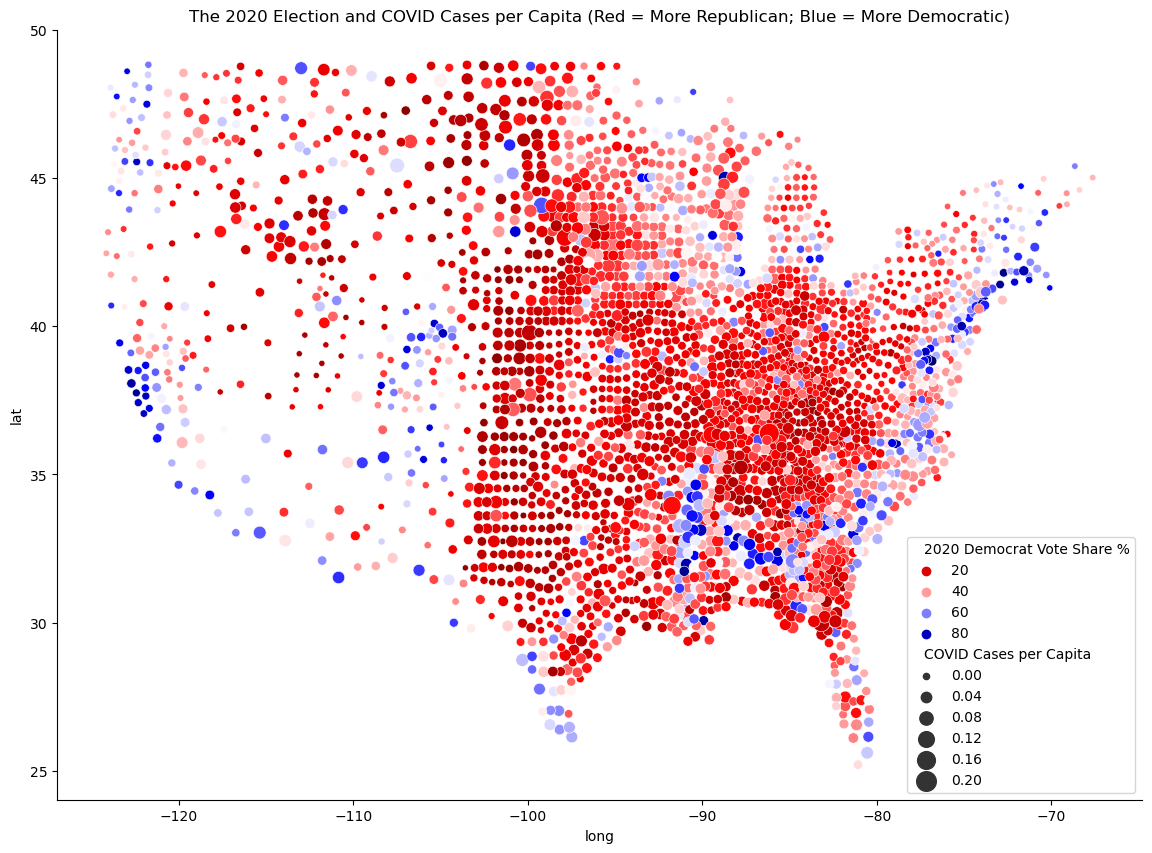

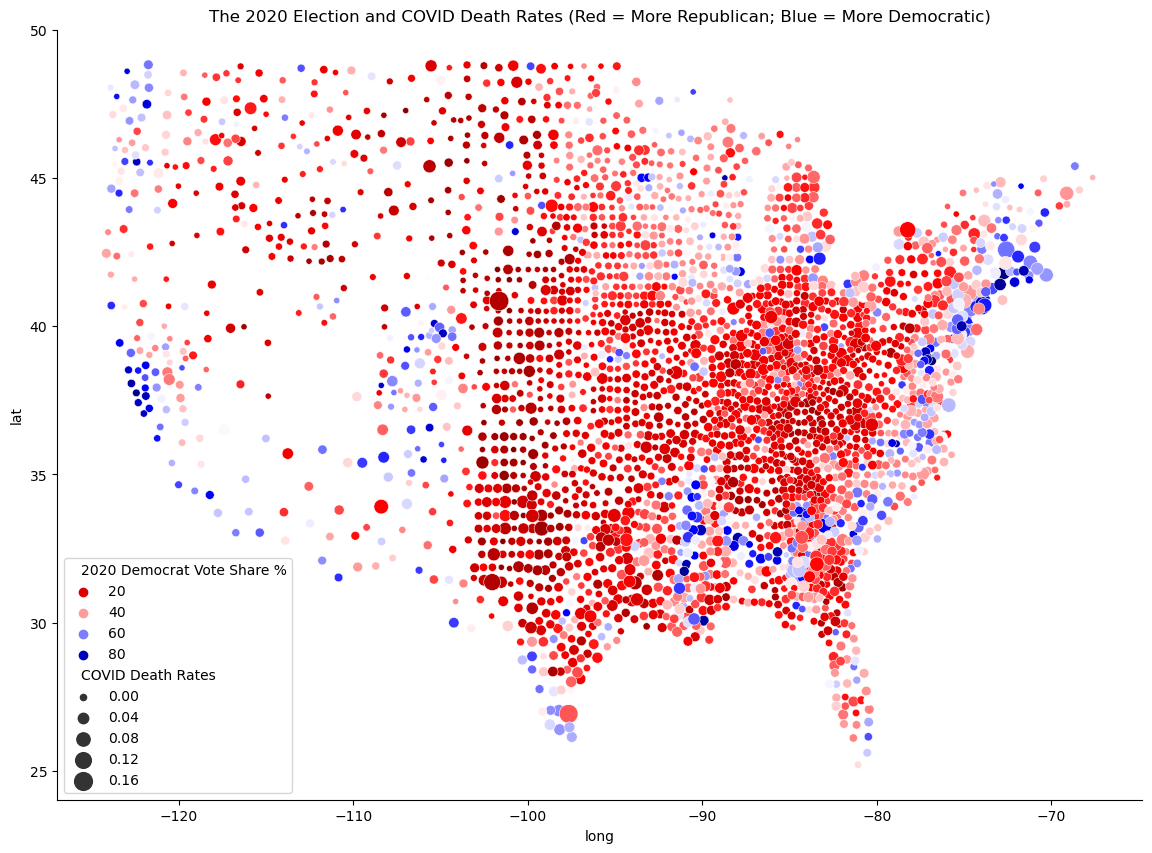

In [19]:
df_mainland = county_new[~county_new["State"].isin(["AK", "HI"])]

plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "long", y = "lat", hue = '2020 Democrat Vote Share %', size = 'COVID Cases per Capita', 
                sizes = (20, 200), size_norm = (0, 0.20), hue_norm = (3.10,94.0), palette = "seismic_r")
plt.title("The 2020 Election and COVID Cases per Capita (Red = More Republican; Blue = More Democratic)");
sns.despine()


plt.figure(figsize = (14,10))
sns.scatterplot(data = df_mainland, x = "long", y = "lat", hue = '2020 Democrat Vote Share %', size = 'COVID Death Rates', 
                sizes = (20, 200), size_norm = (0, 0.20), hue_norm = (3.10,94.0), palette = "seismic_r")
plt.title("The 2020 Election and COVID Death Rates (Red = More Republican; Blue = More Democratic)");
sns.despine()

The final graph for the political affiliation independent variable considers a statewide outlook instead of a county one on the total COVID cases and per capita. This was chosen in order to further investigate concentrations of counties, that are states. 

Observing the trends we see that Democrat held regions dominate the total COVID cases similarly to the interpreatation of the first graph. However considering the per capita it is Republican territories that have greater infection rates. This relationship is also characterized in the previous graph as well with the greatest concentrations revolving around Republican areas.

The significance of this is that these graphs exploring politics and COVID highlight some relationship that points towards greater severity among Republicans than Democrats.

In [20]:
# These graphs have a hover function
fig = px.histogram(county_new, x="State", y="COVID Cases", color="Elected 2020"
             , height=800, width = 1000, color_discrete_sequence=['red','blue'])
fig.layout.update(title_text='COVID Cases in US States <br> (Red = Republican; Blue = Democratic)', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero', title='Covid Cases')
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))
fig.show()

fig = px.histogram(county_new, x="State", y="COVID Cases per Capita", color="Elected 2020"
             , height=800, width = 1000, color_discrete_sequence=['red','blue'])
fig.layout.update(title_text='COVID Cases in US States <br> (Red = Republican; Blue = Democratic)', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero', title='Covid Cases per Capita')
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))
fig.show()

## Wealth

This X variable being measured is wealth or relative wealth. In terms of the metrics used based on the dataset was income, income per capita and the poverty rate. 

For the first set of graphs, income per capita was measured in relation to the COVID death rate in terms of both counties and states. This was chosen in order to assess whether the level of wealth if equally distributed had a correlation with the COVID death rate. This was to see if poorer areas suffered COVID worse perhaps due to lack of quality infrastructure.

Through analysis of the first graph it seems to not have a correlation whatsoever, in fact inserting a trendline returns a R squared value below 0.2. However looking onwards to the second graph where if we were to omit the outliers in both graphs it could be argued that there is a weak negative correlation. This would require looking at the densest area of the graph where both blue and red datapoints seem to imply that regions with a higher income fares off better with COVID.

Despite the graph's displaying weak correlation, it was important to consider this independent variable and plot these datapoints as it would allow us to understand that perhaps relative wealth doesn't affect the response to the COVID pandemic specifically as signifianctly as believed. 

In [21]:
# These graphs have a hover function

fig = px.scatter(states_only, x='Income Per Capita', y='COVID Death Rates', color='2020 Democrat Vote Share %'
                , color_continuous_scale=px.colors.sequential.Bluered_r)
fig.layout.update(title_text='Income Per Capita and COVID Death Rates for US States', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black")
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))
fig.show()

fig2 = px.scatter(county_new, x='Income Per Capita', y='COVID Death Rates', color='Elected 2020'
                , color_discrete_sequence=['red','blue'])
fig2.layout.update(title_text='Income Per Capita and COVID Death Rates for US Counties <br> (Red = Republican; Blue = Democrat)', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black")
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))
fig2.show()

Moving on, consideration for another metric of COVID was considered being simply the cases per capita. This was considered important to measure alongside the previously mentioned wealth metrics, overall and per capita income, as it would be necessary to gauge the impact wealth has on the virulence of COVID even if it doesn't prove to be lethal.

In this case the correlation between the variables can be considered to be relatively stronger than the previous graphs. For instance in the first graph below, omitting outliers, a negative trend is easier to observe. Additionally the second graph below with counties too shows an observable trend.

Thus, with a more general and numerous COVID metric of cases per capita it shows that income has a stronger relationship in that it be can inferred that wealthier regions benefit in a lower infection rate. Perhaps the reason for COVID lethalities showing weak correlation is due to the lack of existence of overall technology or some equivalent to combat the virus in an infected person regardless of wealth. Whereas the spread is easier to control in wealthier regions with resources.

In [22]:
# This graph has a hover function

fig = px.scatter(states_only, x='Income Per Capita', y='COVID Cases per Capita', color_discrete_sequence=['lightgrey'], text='State'
                , width = 1000, height = 800)
fig.layout.update(title_text='Income and COVID Cases per Capita for US States', title_x = 0.5,
                  showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", )
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True))
fig.show()

In [23]:
# This graph has a hover function

fig = px.scatter(county_new, x='Income Per Capita', y='COVID Cases per Capita', color='Elected 2020', 
                 color_discrete_sequence=['red','blue']
                 , height = 800)
fig.layout.update(title_text='Income and COVID Cases per Capita for US Counties <br> (Red = Republican; Blue = Democratic)', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero')
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))
fig.show()

For the final metric in the wealth variable, the poverty rate was used. This was considered based on an assumption that individuals facing greater poverty would have a lack of access to resources and effective quarantine methods and thus be greater exposed to COVID. If such a relationship exists it could be useful in informing public policy to specifically target certain regions to build more effective health initiatives towards countering pandemic viruses. 

Despite this, observation of the graphs say otherwise to a correlational relationship. Inspecting counties first we see that despite increases along the poverty line, the majority of datapoints lie near the lower region of the  COVID per capita and death rate. This would suggest that poverty isn't an indicator of more lethal and infectious COVID. Moreover observing the death rate and US states where if we ignore outliers, it seems to suggest a weak to medium strengh positive correlation. This would rather imply that regions suffering from poverty have a lower chance of death per person. 

However, the poverty rate and covid per capita for US states implies a logical initial outlook in a positive correlation. This would support the assumption mentioned above in how poorer regions categorised through poverty rate would see greater virulence due to perhaps relatively worse infrastructure among other factors.

In [24]:
# These graphs have a hover function

fig = make_subplots(rows=1, cols=2, subplot_titles=("Poverty Rate and COVID Cases per Capita (US Counties)", "Poverty Rate and COVID Death Rate (US Counties)"))

fig.add_trace(go.Scatter(x =county_new['Poverty Rate'], y=county_new['COVID Cases per Capita'], mode='markers', marker = {'color': 'grey'}),row=1, col=1)


fig.add_trace(go.Scatter(x =county_new['Poverty Rate'], y=county_new['COVID Death Rates'], mode='markers', marker = {'color': 'grey'}),row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="", showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero'), 
                  yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero')
                 ,xaxis2 = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero')
                  , yaxis2 = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))

fig.update_annotations(font_size=15)
#fig.update_layout(xaxis3 = dict(range=[0, 25]))
#fig.update_layout(xaxis3=dict(tickvals=[10, 20]))

fig['layout']['xaxis']['title']='Poverty Rate'
fig['layout']['xaxis2']['title']='Poverty Rate'
fig['layout']['yaxis']['title']='COVID Cases'
fig['layout']['yaxis2']['title']='COVID Deaths'
fig.show()

In [25]:
fig = make_subplots(rows=1, cols=2, subplot_titles=("Poverty Rate and COVID per Capita (US States)", "Poverty Rate and COVID Death Rate (US States)"))

fig.add_trace(go.Scatter(x =states_only['Poverty Rate'], y=states_only['COVID Cases per Capita'], mode='markers', marker = {'color': 'grey'}),row=1, col=1)

fig.add_trace(go.Scatter(x =states_only['Poverty Rate'], y=states_only['COVID Death Rates'], mode='markers', marker = {'color': 'grey'}),row=1, col=2)

fig.update_layout(height=600, width=1000, title_text="", showlegend=False, plot_bgcolor = "rgba(0,0,0,0)"
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero'), 
                  yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero')
                 , xaxis2 = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero'), 
                  yaxis2 = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))

fig.update_annotations(font_size=15)

fig['layout']['xaxis']['title']='Poverty Rate'
fig['layout']['xaxis2']['title']='Poverty Rate'
fig['layout']['yaxis']['title']='COVID Cases per Capita'
fig['layout']['yaxis2']['title']='COVID Death Rate'
fig.show()

## Race

Race is another X variable measured with metrics of the percentage makeup by racial group for each state. For this particular variable two other plots below with COVID deaths and cases measured for each state is to be used complementarily. The reason for this is that the collection method of the COVID and racial makeup data doesn't allow for direct comparison to one another without making too great of an extrapolation. Hence what these graphs combined together aim to do is illustrate visually the relationship of the racial makeup of each state and covid deaths and cases.

Some observations from analysing the distribution of race alongside COVID deaths is that for the peaks of the COVID death plot being the states: CT, DC, MA, NJ, NY. The second majority racial group, other than white as they are dominant across all states, is black. Except for NJ state, blacks are the third largest represented race, though this is still significant. Hence while the dominant majority being white across all states isn't particularly interesting, the observation that the blacks feature prominently in states with high deaths is. This could note that perhaps COVID is particularly more lethal towards some races. 

Another interesting observation is if we consider the COVID cases by state plot is that by taking the peaks being states: DC, FL, MA, NJ, excluding AZ and CA, we see that once again the second majority racial group are the blacks. In this case the metric being COVID cases as well indicating that a significant number of cases are highly likely to stem from the black community. As such this is highly relevant to the overall research question that looks at social welfare indicators as propogators of vulnerable indiviudals to COVID.

Race is undoubtedly an important variable as it allows us to pinpoint further beyond states and counties into collection of similar individuals. This can be critical to understanding why COVID can persist and even worsen among a certain demographic.

In [26]:
# These graphs have a hover function

states_only_copy = states_only.copy()
states_only_copy.drop(states_only_copy.columns[range(1,10)], axis=1, inplace=True)
states_only_copy.drop(states_only_copy.columns[range(3,24)], axis=1, inplace=True)

fig = px.bar(states_only_copy, x="State", y=['Hispanic','White','Black','Native','Asian','Pacific'], width=1000 , height=700)
fig.layout.update(title_text='Racial Makeup of US States', title_x = 0.5
                  ,showlegend=True, plot_bgcolor = "rgba(0,0,0,0)", legend_title=""
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero')
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero', title="Percentage"))
fig.show()


fig = px.bar(states_only_copy, x='State', y='COVID Deaths', width=950 , height=700)
fig.layout.update(title_text='COVID Deaths in US States', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)", legend_title=""
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero')
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))
fig.show()

In [27]:
# This graph has a hover function
fig = px.bar(states_only_copy, x='State', y='COVID Cases', width=950 , height=700)
fig.layout.update(title_text='COVID Cases in US States', title_x = 0.5
                  ,showlegend=False, plot_bgcolor = "rgba(0,0,0,0)", legend_title=""
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero')
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))
fig.show()

## Employment

Employment was chosen as a variable specifically the different types of jobs. This was selected as the nature and environment of different jobs can have an impact on how easily COVID is transmitted amongst like workers and hence it would be important to understand the distribution of it. 

An observable trend is that based on the type of work there is a trend as to the working populations distribution and the COVID cases recorded. The below table is color coded in a way that it highlights the vertical shape of each specification of employment. This plot can perhaps allude to a a possible increase in transmission rate to workers in an industry that is farther from the origin on the x axis. Furthermore the plot also reveals the higher number of cases in certain states such as CA, DC, and AZ. 

In relation to the research question, the type of employment based on the proportion of the population working in it can reveal the risk of certain jobs to COVID due to factors like the particular work environment.

In [28]:
# This graph has a hover function

fig = px.scatter(states_only, x=['% in Family Work', '% in Self Employed','% in Construction','% in Production Work','% in Public Work','% in Service Work', '% in Office Work', '% in Professional Work','% in Private Work'], y='COVID Cases', hover_data=["State"], color_discrete_sequence=['yellow','grey','blue','black','yellow','grey','blue','black','yellow'])
fig.layout.update(title_text='% of Workforce in Employment Types and COVID Cases (US States)', title_x = 0.5
                  ,showlegend=True, plot_bgcolor = "rgba(0,0,0,0)", legend_title=""
                  , xaxis = dict(showgrid = True, visible = True, linecolor="black", rangemode = 'tozero', title="% of Workforce",showspikes = True,spikemode  = 'across',spikesnap = 'cursor',showline=True, spikecolor='red')
                  , yaxis = dict(linecolor="black", showgrid=True, visible = True, rangemode = 'tozero'))

fig.show()

## Conclusion

The observed variables and their correlation on COVID results varied significantly. For political affiliation, suggestions of a positive trend were evident when comparing across different COVID results such as per capita versus total. When looking at geographic distribution and vote swings, correlation is evident albeit weakly. Income showed weak to no correlation even across per capita and total COVID results and across counties and state level. Employment level only saw weak correlation in poverty rate and covid per capita on the state level. Race however showed promise specifically in a trend of states with high Black populations and high covid levels. However, these indicators of trends may be extrapolated in that further refinement in statistical analysis is required to reaffirm a correlation. Finally, employment type showed promise when interpreting the results based on the weightage of the employment type on the population and how it can lead to greater COVID severity, though this too needs to be further analysed. Across the board correlation was not observed directly and rather made through explicit assumptions.

Next steps are to move beyond simple regression with weightage and more sophisticated statistical tools in order to properly assess for a probable relationship among the variables on COVID severity.

## Works Cited



OECD. “GDP as a Welfare Metric: The beyond Gdp Agenda.” Understanding National Accounts, 2014, 451–77. https://doi.org/10.1787/9789264214637-16-en. 
 
Razieh, Cameron, Francesco Zaccardi, Nazrul Islam, Clare L Gillies, Yogini V. Chudasama, Alex Rowlands, David E      Kloecker, Melanie J Davies, Kamlesh Khunti, and Thomas Yates. “Ethnic Minorities and Covid-19: Examining Whether Excess Risk Is Mediated through Deprivation.” European Journal of Public Health 31, no. 3 (2021): 630–34. https://doi.org/10.1093/eurpub/ckab041. 

Vogliano, Maxwell. “Rethinking Welfare Metrics: Beyond Aggregative and Composite Indicators to a Dashboard Approach,” 2022.  

## Exercise 2 Week 5

- Mapping each state with county borders
- Initially just do election votes for the color gradient of each county
- Then add hover function with other metrics like covid cases, covid cases per capita, covid death, and covid death rates

Try to make a function to automate this

### Importing the US State files for 2016 and 2020

In [29]:
state_df_2016 = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_state_5m.zip")
state_df_2020 = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_state_5m.zip")
county_df_2016 = gpd.read_file("http://www2.census.gov/geo/tiger/GENZ2016/shp/cb_2016_us_county_5m.zip")
county_df_2020 = gpd.read_file("https://www2.census.gov/geo/tiger/GENZ2020/shp/cb_2020_us_county_5m.zip")

Firstly for the county level

In [48]:
map1 = county_new.copy()
map1.insert(loc = 4,
          column = 'Coordinates',
          value = list(zip(map1.long, map1.lat)))
map1["Coordinates"] = map1["Coordinates"].apply(Point)
map2 = gpd.GeoDataFrame(map1, geometry="Coordinates")

Below a check was made to make sure that all the latitude datapoints are floats, this is to ensure that all counties 

In [31]:
print((map2['lat'].map(type) == float).unique()) # checks if all latitude datapoints are floats
print((map2['long'].map(type) == float).unique()) # checks if all longitude datapoints are floats

[ True]
[ True]


In [32]:
map2_Cali = county_new.copy()
#map2_Cali.drop(columns=['lat', 'long'])
map2_Cali2 = county_df_2020.merge(map2_Cali, left_on="NAME", right_on="County", how="inner")

#county_df_2020 = county_df_2020.set_index('STATE_NAME')
#county_df_2020 = county_df_2020.xs('California')
#county_df_2020 = county_df_2020.reset_index(drop=True)
#map2_Cali2
map2_Cali2 = map2_Cali2.set_index('STATE_NAME')
map2_Cali2 = map2_Cali2.xs('California')
map2_Cali2 = map2_Cali2.reset_index(drop=True)
map2_Cali2.drop_duplicates(subset='NAME', inplace=True)
map2_Cali2

STATEFP COUNTYFP  COUNTYNS        AFFGEOID  GEOID             NAME  \
0       06      087  00277308  0500000US06087  06087       Santa Cruz   
2       06      021  00277275  0500000US06021  06021            Glenn   
3       06      059  00277294  0500000US06059  06059           Orange   
11      06      105  00277317  0500000US06105  06105          Trinity   
13      06      069  00277299  0500000US06069  06069       San Benito   
14      06      023  01681908  0500000US06023  06023         Humboldt   
17      06      033  00277281  0500000US06033  06033             Lake   
29      06      005  01675841  0500000US06005  06005           Amador   
30      06      071  00277300  0500000US06071  06071   San Bernardino   
31      06      103  01692767  0500000US06103  06103           Tehama   
32      06      109  00277319  0500000US06109  06109         Tuolumne   
33      06      083  00277306  0500000US06083  06083    Santa Barbara   
34      06      089  01682610  0500000US06089  06089           Shasta   
35      06      053  00277291  0500000US06053  06053         Monterey   
36      06      091  00277310  0500000US06091  06091           Sierra   
38      06      079  00277304  0500000US06079  06079  San Luis Obispo   
39      06      057  01682927  0500000US06057  06057           Nevada   
41      06      035  01693324  0500000US06035  06035           Lassen   
42      06      017  00277273  0500000US06017  06017        El Dorado   
43      06      073  00277301  0500000US06073  06073        San Diego   
44      06      081  00277305  0500000US06081  06081        San Mateo   
45      06      029  02054176  0500000US06029  06029             Kern   
46      06      007  01675842  0500000US06007  06007            Butte   
49      06      027  01804637  0500000US06027  06027             Inyo   
50      06      063  00277296  0500000US06063  06063           Plumas   
51      06      047  00277288  0500000US06047  06047           Merced   
52      06      043  00277286  0500000US06043  06043         Mariposa   
53      06      009  01675885  0500000US06009  06009        Calaveras   
54      06      049  00277289  0500000US06049  06049            Modoc   
55      06      115  00277322  0500000US06115  06115             Yuba   
56      06      039  00277284  0500000US06039  06039           Madera   
57      06      075  00277302  0500000US06075  06075    San Francisco   
58      06      031  00277280  0500000US06031  06031            Kings   
60      06      045  00277287  0500000US06045  06045        Mendocino   
61      06      011  01675902  0500000US06011  06011           Colusa   
62      06      019  00277274  0500000US06019  06019           Fresno   
63      06      099  00277314  0500000US06099  06099       Stanislaus   
64      06      061  00277295  0500000US06061  06061           Placer   
65      06      097  01657246  0500000US06097  06097           Sonoma   
66      06      095  00277312  0500000US06095  06095           Solano   
67      06      107  00277318  0500000US06107  06107           Tulare   
68      06      015  01682074  0500000US06015  06015        Del Norte   
69      06      003  01675840  0500000US06003  06003           Alpine   
70      06      085  00277307  0500000US06085  06085      Santa Clara   
71      06      041  00277285  0500000US06041  06041            Marin   
72      06      077  00277303  0500000US06077  06077      San Joaquin   
73      06      051  00277290  0500000US06051  06051             Mono   
74      06      025  00277277  0500000US06025  06025         Imperial   
75      06      065  00277297  0500000US06065  06065        Riverside   
76      06      093  00277311  0500000US06093  06093         Siskiyou   
77      06      055  00277292  0500000US06055  06055             Napa   
78      06      113  00277321  0500000US06113  06113             Yolo   
79      06      111  00277320  0500000US06111  06111          Ventura   
80      06      101  00277315  0500000US06101  06101         

## 2020 Maps

In [33]:
county_df_California = county_df_2020.query("STATEFP == '06'")

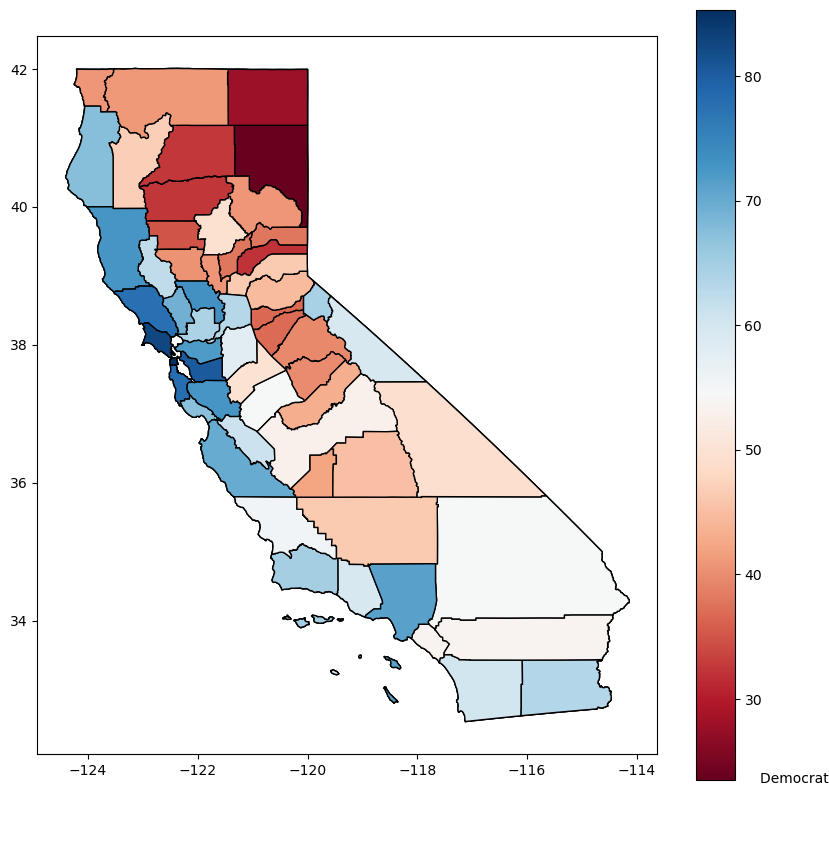

In [34]:
fig, gax = plt.subplots(figsize=(10, 10))

state_df_2020.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df_California.plot(ax=gax, edgecolor="black", color="white")

# Plot the counties and pass 'rel_trump_share' as the data to color
map2_Cali2.plot(
    ax=gax, edgecolor='black', column='2020 Democrat Vote Share %', legend=True, cmap='RdBu',
    vmin=23.500000, vmax=85.300000 #range of your column value for the color legend
)

# Add text to let people know what we are plotting
gax.annotate('Democrat vote share',xy=(0.76, 0.06),  xycoords='figure fraction')

# I don't want the axis with long and lat
plt.axis('on')

plt.show()

plt.show()

In [35]:
pip install tol-colors

Note: you may need to restart the kernel to use updated packages.


In [42]:
import tol_colors as tc
cmap = tc.tol_cmap('BuRd')

In [37]:
from bokeh.io import output_notebook
from bokeh.plotting import figure, ColumnDataSource
from bokeh.io import output_notebook, show, output_file
from bokeh.plotting import figure
from bokeh.models import GeoJSONDataSource, LinearColorMapper, ColorBar, HoverTool
from bokeh.palettes import brewer
output_notebook()
import json
#Convert data to geojson for bokeh
wi_geojson=GeoJSONDataSource(geojson=map2_Cali2.to_json())

Loading BokehJS ...

In [44]:
# Reversed the RdBu[10] color map manually
RdBu_r = ('#67001f', '#b2182b','#d6604d', '#f4a582', '#fddbc7', '#d1e5f0', '#92c5de', '#4393c3', '#2166ac', '#053061')

In [46]:
color_mapper = LinearColorMapper(palette = RdBu_r, low = 0, high = 100)
color_bar = ColorBar(color_mapper=color_mapper, label_standoff=8,width = 500, height = 20,
                     border_line_color=None,location = (0,0), orientation = 'horizontal')
hover = HoverTool(tooltips = [ ('County','@County'), ('Portion Biden','@{2020 Democrat Vote Share %}'),
                             ('Portion Trump', '@{2020 Republican Vote Share %}')])
color_bar = ColorBar(color_mapper = color_mapper,
                     label_standoff = 12,
                     location = (0,0),
                     title = 'Voting Trend (Red = More Republican; Blue = More Democratic)')
p = figure(title="CA Voting in 2020 Presidential Election", tools=[hover])
p.patches("xs","ys",source=wi_geojson,
          fill_color = {'field' :'2020 Democrat Vote Share %', 'transform' : color_mapper})
p.add_layout(color_bar, 'below')
show(p)